     ML Project 2020

Project requirement: The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.


import the required packages for the program

In [1]:
# For data frames.
import pandas as pd
import seaborn as sns

# For numerical arrays.
import numpy as np

# For plotting
import matplotlib.pyplot as plt

#For maths
import math as m

from scipy.optimize import curve_fit
import sklearn.model_selection as skms
import sklearn.preprocessing as skpp
import sklearn.metrics as skme
import tensorflow.keras as kr
from keras.models import model_from_json


In [2]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) 

<b>PowerProduction Dataset</b>


In [3]:
# File provided as a txt file. I saved it as a csv file.
Power_data = pd.read_csv("data\powerproduction.csv")

# Make a copy of the original dataset in case we need it later.
Power_data_copy = Power_data

# Size?
shape = Power_data.shape
print("Data frame shape", shape, "r,c")

# Check for NaNs, missing values etc
print(Power_data.count())

Data frame shape (500, 2) r,c
speed    500
power    500
dtype: int64


In [4]:
# Have a look at the data from our Power Production input
Power_data

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


Since the power column has zero output from the above we will check few lines from top and bottom of the file



In [5]:
# Print firdt 20 rows
Power_data.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [6]:
Power_data.tail(20)

,speed,power
480,23.974,94.270
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


Looking at the raw data it is noted that wind speeds 0.275 and below generate no power, wind speeds 24.499 generate no power. Even from the above description the power for the low and high level wind speed power has taken zero value. So we will look at some more rows from the top to find the data for Power column.

In [7]:
# Look at some quick descriptive statistics of the numeric data.
print(Power_data.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


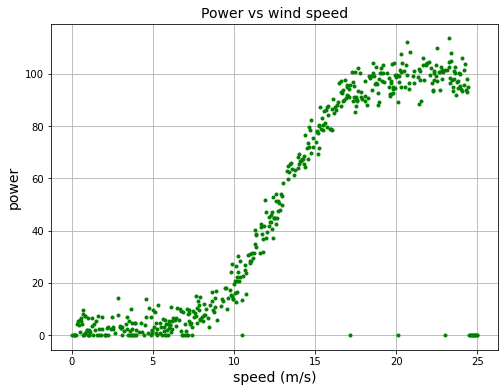

In [8]:
# Try plotting power as a function of wind speed to check for any obvious relationship between them.
plt.plot(Power_data['speed'], Power_data['power'],  '.g')
plt.title('Power vs wind speed', fontsize='14')
plt.xlabel('speed (m/s)', fontsize='14')
plt.ylabel('power', fontsize='14')
plt.grid()

With the given data we can see that there is little power is generated until some threshold speed is achieved (about 7 m/s), then it increases nearly linearly in a range of wind speeds (8 - 17 m/s), before saturating above a certain wind speed (about 17 m/s). The plot would suggest there is a range of wind speeds where the power seems to increase linearly with wind speed. 

I would like to do some cleanup to remove the zero power just to make it clear while finding the promising model

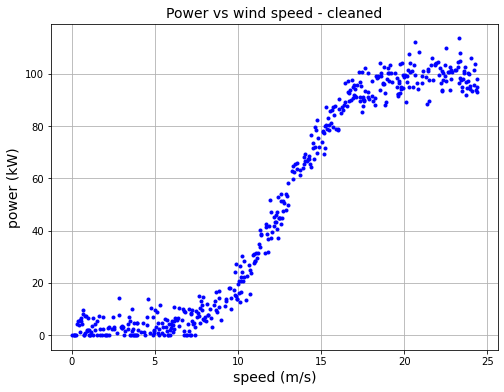

In [9]:
# Remove the rows with zero values to Power column from my existing dataset.
Power_data.drop(Power_data.loc[(Power_data.power == 0) & (Power_data.speed > 10)].index, inplace=True)

plt.plot(Power_data['speed'], Power_data['power'],  '.b')
plt.title('Power vs wind speed - cleaned', fontsize='14')
plt.xlabel('speed (m/s)', fontsize='14')
plt.ylabel('power (kW)', fontsize='14')
plt.grid()